# Game: Caesar Cipher

## 1. Rules

In this program, we convert normal English into secret code. We can also convert secret codes back into regular English. Only someone who knows the key to the secret codes will be able to understand the messages.

## 2. Flowchart

In [1]:
from graphviz import Digraph

In [2]:
dot = Digraph(comment='Caesar Cipher')

dot.node('START', 'START', shape='oval', style='filled', fillcolor='grey')
dot.node('Ask for Mode & Message', 'Ask for \n Mode & Message')
dot.node('Ask for Key', 'Ask for \n Key')

print_translation = Digraph('Print translated Message', node_attr={'shape': 'doublecircle', 'color': 'green', 'style': 'filled', 'fillcolor': 'white'})
print_translation.node('Print translated Message','Print \n translated \n Message')
dot.subgraph(print_translation)

dot.node('Translate Message via each Key', 'Translate \n Message \n via each Key')
dot.node('Count English Words via each Key', 'Count \n English \n Words \n via each Key')
dot.node('Retrieve Key with Max English Words', 'Retrieve Key \n with Max \n English Words')

dot.node('Translate Again?', 'Translate \n Again?')
dot.node('END', 'END', shape='oval', style='filled', fillcolor='grey')

In [3]:
dot.edge('START', 'Ask for Mode & Message')
dot.edge('Ask for Mode & Message', 'Ask for Key', label='Encrypt \n or \n Decrypt')
dot.edge('Ask for Key', 'Print translated Message')

dot.edge('Ask for Mode & Message', 'Translate Message via each Key', label='Brute \n Force')
dot.edge('Translate Message via each Key', 'Count English Words via each Key')
dot.edge('Count English Words via each Key', 'Retrieve Key with Max English Words')
dot.edge('Retrieve Key with Max English Words', 'Print translated Message')

dot.edge('Print translated Message', 'Translate Again?')
dot.edge('Translate Again?', 'Ask for Mode & Message', label='Yes')
dot.edge('Translate Again?', 'END', label='No')

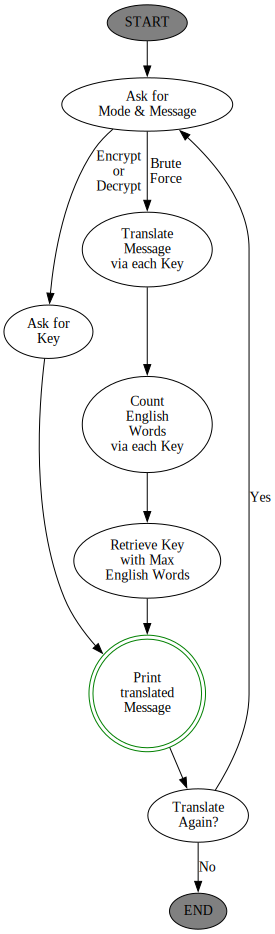

In [4]:
dot

## 3. Program

In [5]:
# Setting the maximum key length.
SYMBOLS = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz123456789!@#$%^&*()"
MAX_KEY_SIZE = len(SYMBOLS)

# This will help retrieve english words from the many messages printed by the brute force mode.
import nltk
#nltk.download('words')
# The Natural Language Toolkit (nltk) is a python library used for Natural Language Processing (NLP)

In [6]:
# Function determines whether the user wants to encrypt or decrypt or use the brute force (no key).
def getMode():
    while True:
        print("Do you wish to encrypt, decrypt or brute-force a message?")
        mode = input().lower()
        if mode in ['encrypt', 'e', 'decrypt', 'd', 'brute', 'b']:
            return mode
        else:
            print('Enter either "encrypt" or "e" or "decrypt" or "d" or "brute" or "b".')

In [7]:
# Function retrieves the message from the user.
def getMessage():
    print('Enter your message:')
    return input()

In [8]:
# Function retrieves the key from the user.
def getKey():
    key = 0
    while True:
        print('Enter the key number (1-%s)' % (MAX_KEY_SIZE))
        key = int(input())
        if (key >= 1 and key <= MAX_KEY_SIZE):
            return key

In [9]:
# Function translates the message.
def getTranslatedMessage(mode, message, key):
    if mode[0] == 'd':
        key = -key
    translated = ''

    for symbol in message:
        symbolIndex = SYMBOLS.find(symbol)
        if symbolIndex == -1: # Symbol not found in SYMBOLS.
            # Just add this symbol without any change.
            translated += symbol
        else:
            # Encrypt or decrypt
            symbolIndex += key

            if symbolIndex >= len(SYMBOLS):
                symbolIndex -= len(SYMBOLS)
            elif symbolIndex < 0:
                symbolIndex += len(SYMBOLS)

            translated += SYMBOLS[symbolIndex]
    return translated

In [10]:
# Function retrieves the Key that unlocks the message
def getEnglish(messageList):
    englishWords = set(nltk.corpus.words.words())
    largestEnglishCount = 0
    correcKey = 1
    
    # Look for the sequence of english words in each decrypted message
    englishCounts = [(messageList.index(message)+1,
                      sum(1 for word in message.split() if word.lower() in englishWords))
                     for message in messageList]
    # Get the message with the largest sequence of english words
    correctKey, largestEnglishCount = max(englishCounts, key=lambda x: x[1])
    print(correctKey, messageList[correctKey-1])

In [11]:
print('C A E S A R   C I P H E R !')
print()
while True:
    mode = getMode()
    message = getMessage()

    if mode[0] != 'b':
        key = getKey()
        print('Your translated text is:')
        print(getTranslatedMessage(mode,message,key))

    else:
        print('Your translated text is:')
        key = 1
        translatedList=[]
        for key in range(1, MAX_KEY_SIZE + 1):
            translatedList.append(getTranslatedMessage('decrypt', message, key))
            key += 1
        getEnglish(translatedList)
            
    print('Do you want to translate again? (yes or no)')
    if not input().lower().startswith('y'):
        break

C A E S A R   C I P H E R !

Do you wish to encrypt, decrypt or brute-force a message?


 encrypt


Enter your message:


 We will eat pizza tonight at 9:00PM with Mario at the canteen.


Enter the key number (1-71)


 57


Your translated text is:
IQ iUXX QMf bUllM faZUSTf Mf u:00B( iUfT (MdUa Mf fTQ OMZfQQZ.
Do you want to translate again? (yes or no)


 yes


Do you wish to encrypt, decrypt or brute-force a message?


 decrypt


Enter your message:


 IQ iUXX QMf bUllM faZUSTf Mf u:00B( iUfT (MdUa Mf fTQ OMZfQQZ.


Enter the key number (1-71)


 57


Your translated text is:
We will eat pizza tonight at 9:00PM with Mario at the canteen.
Do you want to translate again? (yes or no)


 yes


Do you wish to encrypt, decrypt or brute-force a message?


 encrypt


Enter your message:


 Ww will eat croissants for breakfast at 8:00AM with Pierre at the bakery.


Enter the key number (1-71)


 42


Your translated text is:
$T TFII B*Q )OLFPP*KQP CLO (OB*HC*PQ *Q e:00q3 TFQE 6FBOOB *Q QEB (*HBOV.
Do you want to translate again? (yes or no)


 yes


Do you wish to encrypt, decrypt or brute-force a message?


 brute


Enter your message:


 $T TFII B*Q )OLFPP*KQP CLO (OB*HC*PQ *Q e:00q3 TFQE 6FBOOB *Q QEB (*HBOV.


Your translated text is:
42 Ww will eat croissants for breakfast at 8:00AM with Pierre at the bakery.
Do you want to translate again? (yes or no)


 no


## 4. Notes

### 4.1 Some lexicon:
- Cryptography = science of writing secret codes
- cipher = secret code system
- encrypting = converting the plaintext into the encoded message
- ciphertext = plaintext once converted into encoded message
- decrypting = converting the ciphertext back into the plaintext
- keys = secret values that let you decrypt ciphertext
- symbols = encrypted letters

### 4.2 List comprehension

List comprehension is a concise way to create lists in Python. It allows us to create a list based on an existing list, using a single line of code. It is written inside square brackets, and consists of an expression followed by a for clause, and optionally one or more if clauses. The basic syntax is as follows:

*new_list = [expression for item in iterable if condition]*

Here's what each part means:

- new_list: The new list that will be created.
- expression: The operation that will be performed on each item in the iterable.
- item: The current item in the iterable.
- iterable: The original list, set, or any other iterable object.
- condition (optional): The condition that each item must satisfy in order to be included in the new list.

In [14]:
numbers = [1, 2, 3, 4, 5]
squares = [x**2 for x in numbers]
print(squares)

[1, 4, 9, 16, 25]


What if we would have not used a list comprehension in our code? We would have used the following longer version:

In [12]:
def getEnglish(messageList):
    englishWords = set(nltk.corpus.words.words())
    largestEnglishCount = 0
    correcKey = 1
    
    for message in messageList:
        englishCount = 0
        
        for word in message.split():
            
            if word.lower() in englishWords:
                englishCount += 1
                
        # We want the largest sequence of english words
        if largestEnglishCount < englishCount:
            largestEnglishCount = englishCount
            correctKey = messageList.index(message)
            
    print(correctKey, messageList[correctKey])